In [7]:
from keras.models import model_from_json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_the_saved_model(saved_model):
    json_file = open('model_final.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model_final.h5")
    return loaded_model

In [4]:
def Making_the_image_ready_for_prediction(image_path):
    img = cv2.imread(r'tes.JPG',cv2.IMREAD_GRAYSCALE)
    #kernel = np.ones((3,3),np.uint8)
    plt.imshow(img)
    if img is not None:
        #images.append(img)
        img=~img
        ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
        w=int(28)
        h=int(28)
        train_data=[]
        #print(len(cnt))
        rects=[]
        for c in cnt :
            x,y,w,h= cv2.boundingRect(c)
            rect=[x,y,w,h]
            rects.append(rect)
        #print(rects)
        bool_rect=[]
        for r in rects:
            l=[]
            for rec in rects:
                flag=0
                if rec!=r:
                    if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                        flag=1
                    l.append(flag)
                if rec==r:
                    l.append(0)
            bool_rect.append(l)
        #print(bool_rect)
        dump_rect=[]
        for i in range(0,len(cnt)):
            for j in range(0,len(cnt)):
                if bool_rect[i][j]==1:
                    area1=rects[i][2]*rects[i][3]
                    area2=rects[j][2]*rects[j][3]
                    if(area1==min(area1,area2)):
                        dump_rect.append(rects[i])
        #print(len(dump_rect)) 
        final_rect=[i for i in rects if i not in dump_rect]
        #print(final_rect)
        for r in final_rect:
            x=r[0]
            y=r[1]
            w=r[2]
            h=r[3]
            im_crop =thresh[y:y+h+10,x:x+w+10]
        

            im_resize = cv2.resize(im_crop,(28,28))
            #cv2.imshow("work",im_resize)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

            im_resize=np.reshape(im_resize,(28,28,1))
            train_data.append(im_resize)
        return train_data
     

In [5]:
def  predictions(image_path,saved_model):
    loaded_model=load_the_saved_model(saved_model)
    train_data=Making_the_image_ready_for_prediction(image_path)
    s=''
    for i in range(len(train_data)):
        train_data[i]=np.array(train_data[i])
        train_data[i]=train_data[i].reshape(1,28,28,1)
        result=loaded_model.predict_classes(train_data[i])
        #print(result)
        if(result[0]==10):
            s=s+'-'
        if(result[0]==11):
            s=s+'+'
        if(result[0]==12):
            s=s+'*'
        if(result[0]==0):
            s=s+'0'
        if(result[0]==1):
            s=s+'1'
        if(result[0]==2):
            s=s+'2'
        if(result[0]==3):
            s=s+'3'
        if(result[0]==4):
            s=s+'4'
        if(result[0]==5):
            s=s+'5'
        if(result[0]==6):
            s=s+'6'
        if(result[0]==7):
            s=s+'7'
        if(result[0]==8):
            s=s+'8'
        if(result[0]==9):
            s=s+'9'
    output=s
    print("The calculation in the image is",output,"The output of the calculation:",eval(output))
    
    

The calculation in the image is 213-18 The output of the calculation: 195


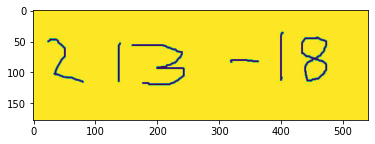

In [8]:
predictions('tes.JPG','model_final.json')